In [7]:
%run ../MLHCExperiment-Common-Val17Test18.ipynb

In [2]:
all_visits = read_data()
all_visits = all_visits.where(all_visits["AdjCount"] > 0).dropna()

In [8]:
def run_one_step_ahead_nn(filename, name, features, label):
    print(name)
    X = all_visits[features]
    y = all_visits[label]

    mses = list()
    
    X_train, y_train, X_val, y_val, X_test, y_test = split_for_baseline_and_nn(X, y)

    OSH_DATES = X.loc[VAL_END:TEST_END].index
    
    start = time.time()
    predictions = list()

    model = compile_nn_weights_from_file(filename, X_train, 64, 64)

    # fit time series model
    for i in range(len(OSH_DATES) - 1):
        start2 = time.time()
        prev_date = OSH_DATES[i]
        next_date = OSH_DATES[i + 1]

        if i == 0:
            model.fit(X_val, y_val.values, epochs=1, shuffle=False, verbose=0)
        if i > 0:
            history = model.fit(X_test.loc[prev_date].values.reshape(1, -1),
                                pd.Series(y_test.loc[prev_date]).values,
                                epochs=1, shuffle=False, verbose=0)

        # keras makes it really hard to predict one day, so predict the whole future and take
        # the first result
        y_pred = model.predict(X_test.loc[next_date:], batch_size=1)
        predictions.extend(y_pred[0])
        end2 = time.time()
        if i % 14 == 0:
            print("14d ending with %s done; last one took %.2f s" % (str(next_date), end2-start2))

    mses.append(mean_squared_error(predictions, y_test))
    end = time.time()
    print("Trial completed in %.2f s" % (end - start))
    print("Average MSE so far: %.3f (%.3f)" % (np.mean(mses), np.std(mses)))
    
    #print_mse_metrics(mses)
    y_pred = np.array(predictions).flatten()
    
    fig, ax = plt.subplots(figsize=(15,7))
    ax.set(title=name, xlabel='Date', ylabel='Sick Visits Per FTE')
    all_visits.loc[TEST_START:, label].plot(ax=ax, color='gray', style='.', label='actual sick visits/fte')
    plt.scatter(all_visits.loc[TEST_START:].index, y_pred, color='r',label='predicted sick visits/fte')
    plt.legend()
    return mses, y_pred

NNModels/64-64Best/Dynamic-NN-AllVisits-64-64-Trial0-1562302673.171411.h5
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
14d ending with 2018-01-01 00:00:00 done; last one took 1.24 s
14d ending with 2018-01-15 00:00:00 done; last one took 0.12 s
14d ending with 2018-01-29 00:00:00 done; last one took 0.14 s
14d ending with 2018-02-12 00:00:00 done; last one took 0.11 s
14d ending with 2018-02-26 00:00:00 done; last one took 0.15 s
14d ending with 2018-03-13 00:00:00 done; last one took 0.09 s
14d ending with 2018-03-27 00:00:00 done; last one took 0.09 s
14d ending with 2018-04-10 00:00:00 done; last one took 0.08 s
14d ending with 2018-04-24 00:00:00 done; last one took 0.07 s
14d ending with 2018-05-08 00:00:00 done; last one took 0.07 s
14d ending with 2018-05-22 00:00:00 done; last one took 0.06 s
14d ending with 2018-06-05 00:00:00 done; last one took 0.08 s
14

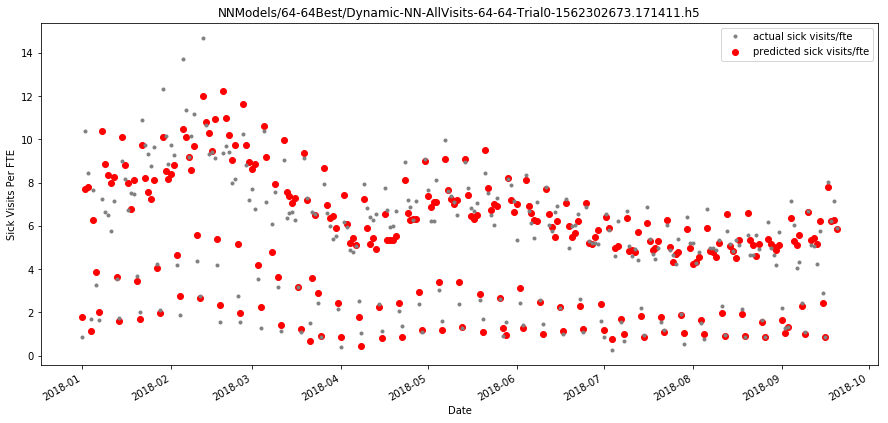

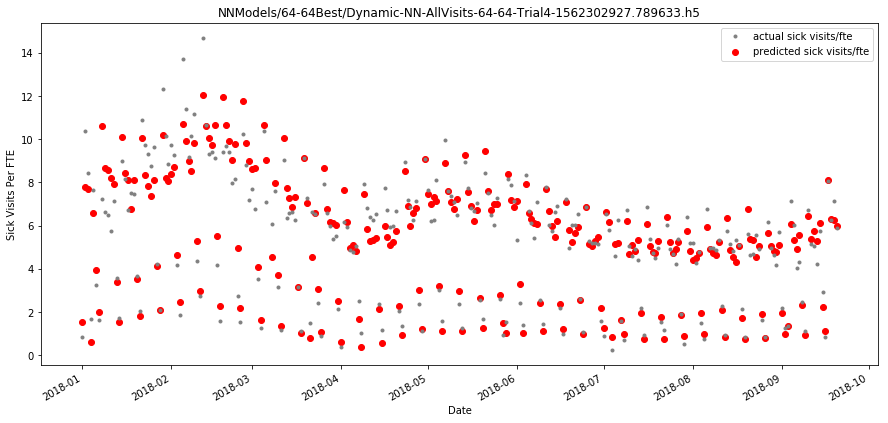

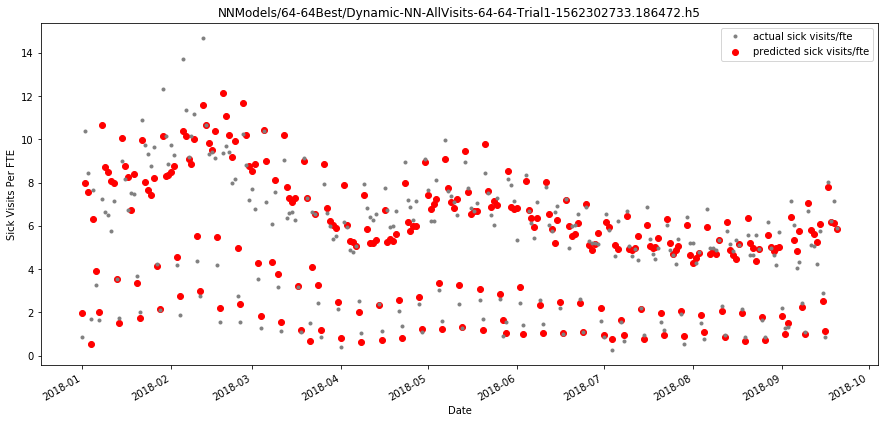

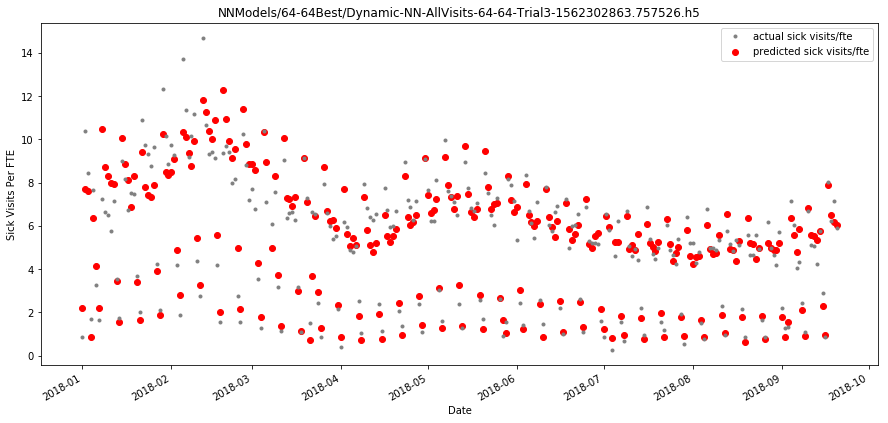

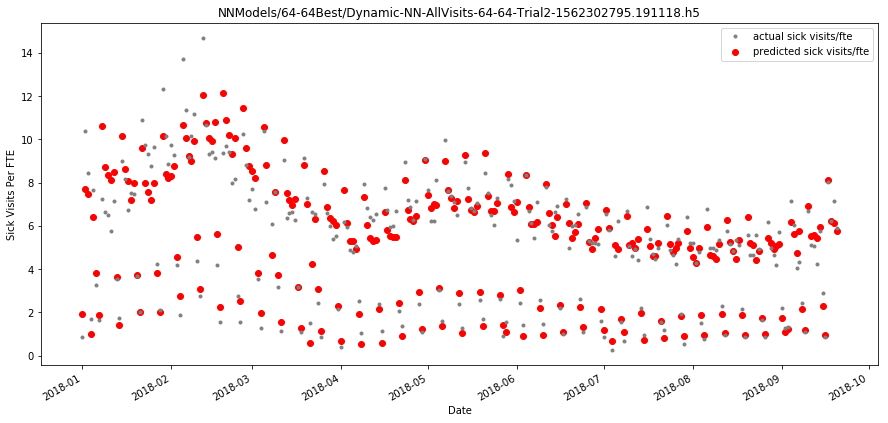

In [5]:
filenames = prebuilt_nn_models["64-64"]

mses = list()

for filename in filenames:
    mse, _ = run_one_step_ahead_nn("../" + filename, filename, BASE_FEATURES, ALL_VISITS_LABEL)
    mses.append(mse)

print_mse_metrics(mses)

NNModels/64-64Resp/Dynamic-NN-RespVisits-64-64-Trial2-1562368216.3867679.h5
14d ending with 2018-01-01 00:00:00 done; last one took 2.51 s
14d ending with 2018-01-15 00:00:00 done; last one took 0.13 s
14d ending with 2018-01-29 00:00:00 done; last one took 0.16 s
14d ending with 2018-02-12 00:00:00 done; last one took 0.12 s
14d ending with 2018-02-26 00:00:00 done; last one took 0.12 s
14d ending with 2018-03-13 00:00:00 done; last one took 0.10 s
14d ending with 2018-03-27 00:00:00 done; last one took 0.11 s
14d ending with 2018-04-10 00:00:00 done; last one took 0.10 s
14d ending with 2018-04-24 00:00:00 done; last one took 0.08 s
14d ending with 2018-05-08 00:00:00 done; last one took 0.08 s
14d ending with 2018-05-22 00:00:00 done; last one took 0.09 s
14d ending with 2018-06-05 00:00:00 done; last one took 0.06 s
14d ending with 2018-06-19 00:00:00 done; last one took 0.08 s
14d ending with 2018-07-03 00:00:00 done; last one took 0.08 s
14d ending with 2018-07-17 00:00:00 done; 

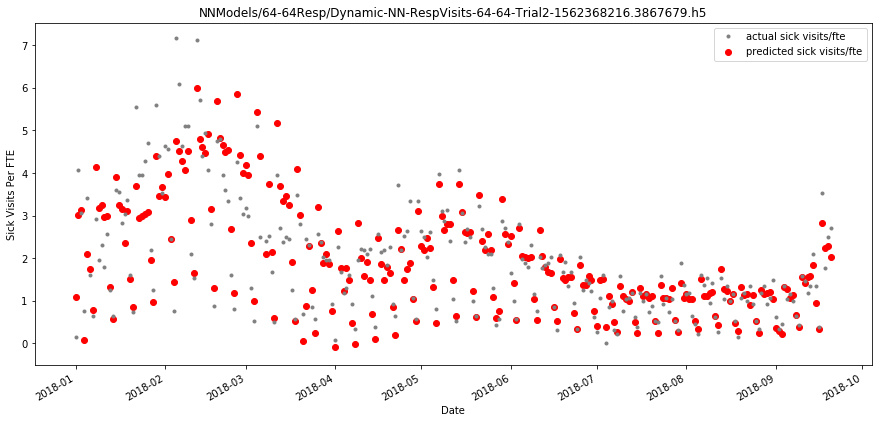

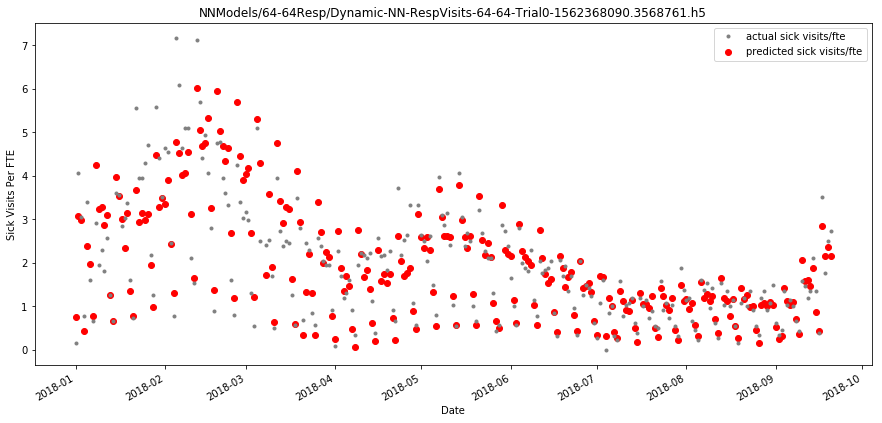

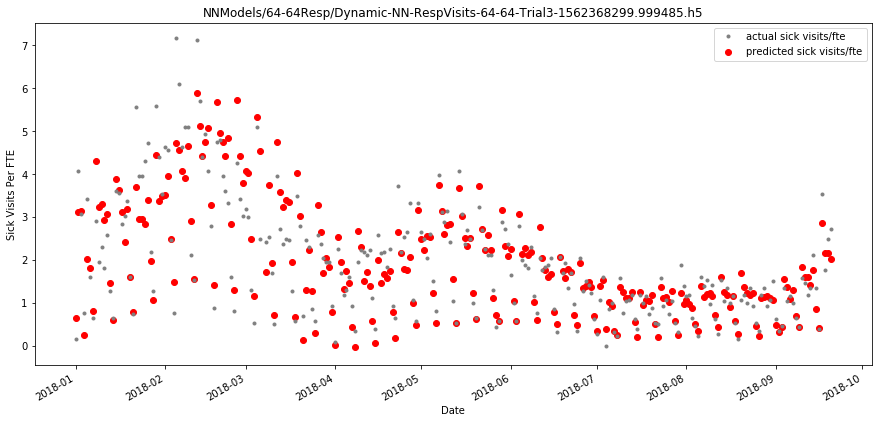

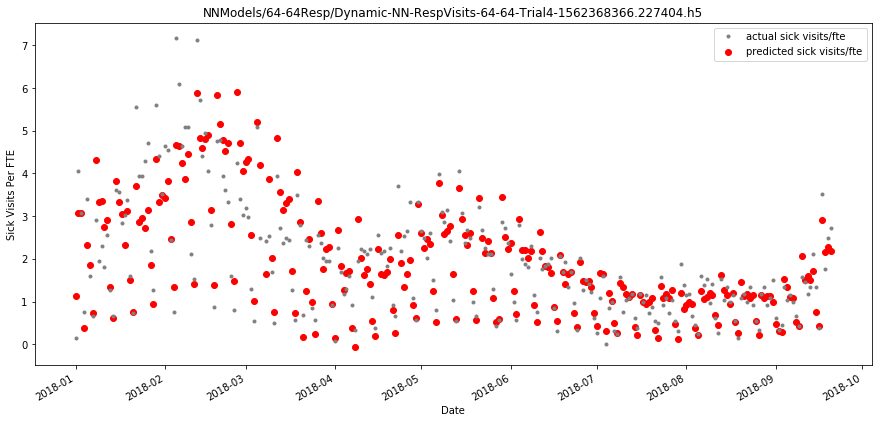

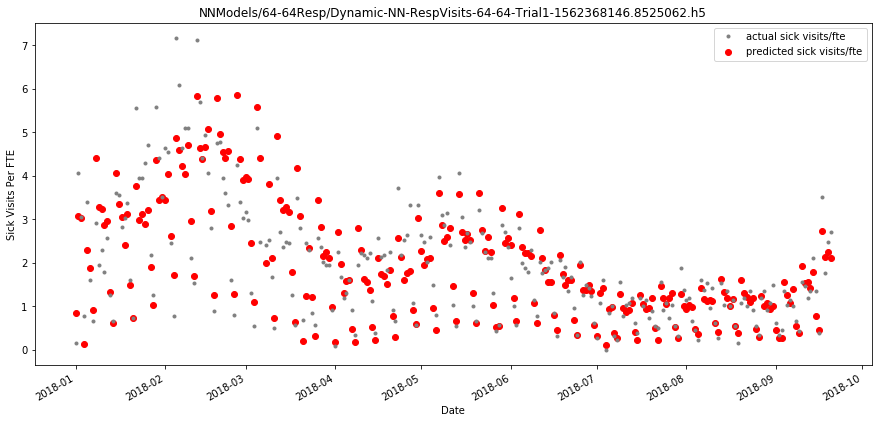

In [9]:
filenames_r = prebuilt_nn_models["64-64R"]

mses_r = list()

for filename in filenames_r:
    mse, _ = run_one_step_ahead_nn("../" + filename, filename, BASE_FEATURES, ICD8_LABEL)
    mses_r.append(mse)

print_mse_metrics(mses_r)

NNModels/64-64NonResp/Dynamic-NN-NonRespVisits-64-64-Trial0-1562368401.0504398.h5
14d ending with 2018-01-01 00:00:00 done; last one took 3.67 s
14d ending with 2018-01-15 00:00:00 done; last one took 0.17 s
14d ending with 2018-01-29 00:00:00 done; last one took 0.21 s
14d ending with 2018-02-12 00:00:00 done; last one took 0.16 s
14d ending with 2018-02-26 00:00:00 done; last one took 0.13 s
14d ending with 2018-03-13 00:00:00 done; last one took 0.13 s
14d ending with 2018-03-27 00:00:00 done; last one took 0.18 s
14d ending with 2018-04-10 00:00:00 done; last one took 0.14 s
14d ending with 2018-04-24 00:00:00 done; last one took 0.12 s
14d ending with 2018-05-08 00:00:00 done; last one took 0.18 s
14d ending with 2018-05-22 00:00:00 done; last one took 0.12 s
14d ending with 2018-06-05 00:00:00 done; last one took 0.11 s
14d ending with 2018-06-19 00:00:00 done; last one took 0.09 s
14d ending with 2018-07-03 00:00:00 done; last one took 0.06 s
14d ending with 2018-07-17 00:00:00 

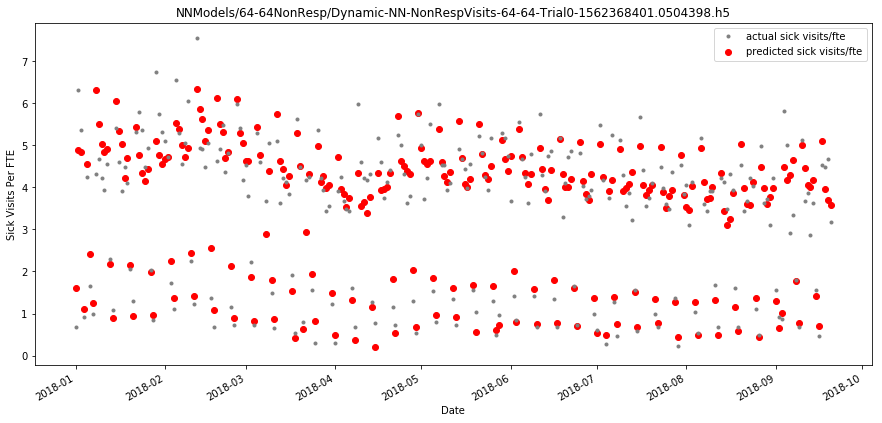

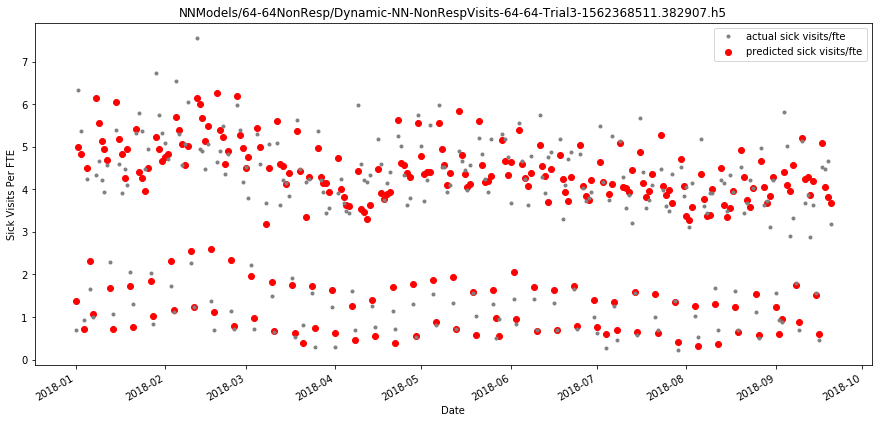

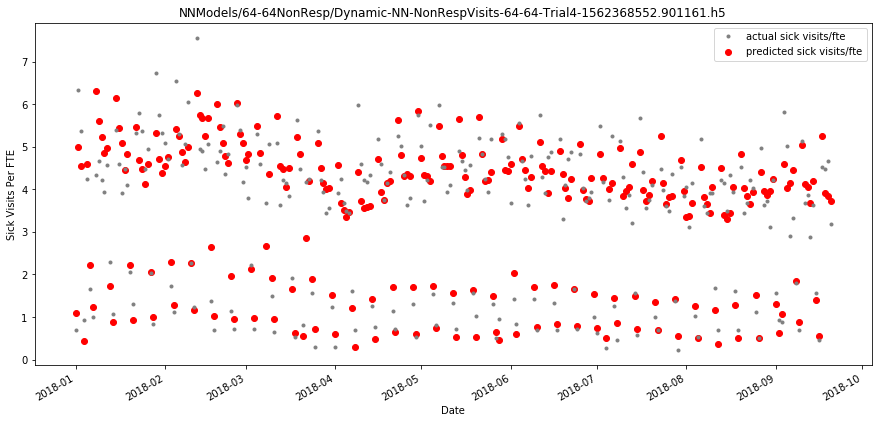

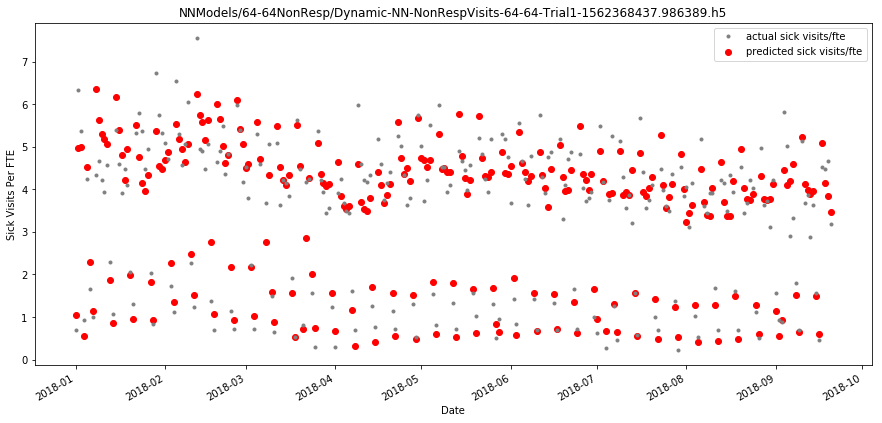

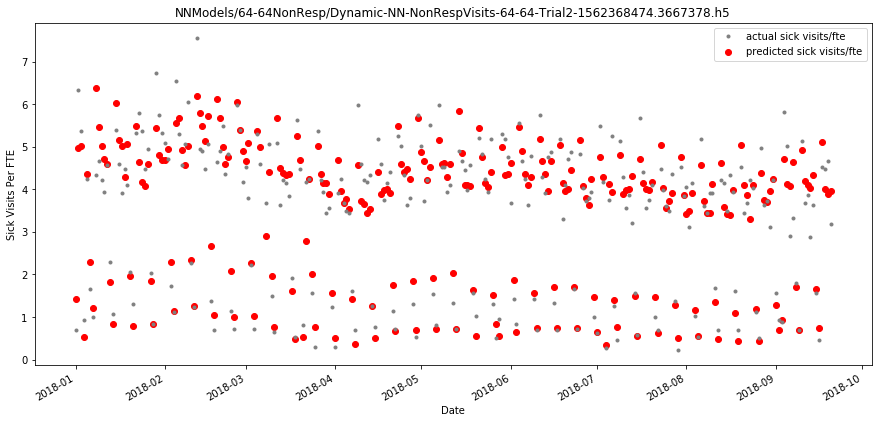

In [10]:
filenames_nr = prebuilt_nn_models["64-64NR"]

mses_nr = list()

for filename in filenames_nr:
    mse, _ = run_one_step_ahead_nn("../" + filename, filename, BASE_FEATURES, ICD8OPP_LABEL)
    mses_nr.append(mse)

print_mse_metrics(mses_nr)